In [ ]:
import itertools as it
import networkx as nx
import matplotlib.pyplot as plt


def vsi_grafi(n, e):
    # Generate all possible edges combinations
    all_edges = list(it.combinations(range(n), 2))
    
    # Check if e is valid
    if e < n-1 or e > len(all_edges):
        raise ValueError("Invalid number of edges for a graph with {} nodes.".format(n))
    
    # Generate all graphs with n nodes and e edges
    graphs = []
    for edges in it.combinations(all_edges, e):
        G = nx.Graph()
        G.add_nodes_from(range(n))
        G.add_edges_from(edges)
        if nx.is_connected(G):
            graphs.append(G)
    
    return graphs

n = 1

for i in range(1, n + 1):
    for j in range(i-1, int(i*(i-1)/2 + 1)):
        for g in vsi_grafi(i, j):
            print(g.degree())
            plt.figure(figsize=(8, 8))
            nx.draw(g, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, font_size=10)
            plt.show()
            g.nodes()


In [6]:
import networkx as nx
import matplotlib.pyplot as plt


def vsota_razdalj(graf, vozlisce):
    vsota = 0
    for v in graf.nodes - {vozlisce}:
        vsota += nx.shortest_path_length(graf, vozlisce, v)
    return vsota


def potratno_ravnovesje_sum(graf):
    for v1 in graf.nodes:
        for p in list(graf.edges(v1)):
            for v2 in graf.nodes - {v1}:
                testni_graf = graf.copy()
                testni_graf.remove_edge(*p)
                testni_graf.add_edge(v1, v2)
                if nx.is_connected(testni_graf):
                    if vsota_razdalj(graf, v1) > vsota_razdalj(testni_graf, v1):
                        return f"Ni sum ravnovesje, vozlišču {v1} se splača zamenjati povezavo {p} z povezavo {v1, v2}"
    return 'Je ravnovesje'


def ekzaktno_sum(graf):    
    def loop_sum(graf):
        ravnovesni_graf = graf.copy()
        for v1 in graf.nodes:
            preostale_povezave = list(graf.edges(v1))
            for p in list(graf.edges(v1)):
                preostale_povezave.remove(p)
                for v2 in graf.nodes - {v1}:
                    testni_graf = graf.copy()
                    testni_graf.remove_edge(*p)
                    testni_graf.add_edge(v1, v2)
                    if nx.is_connected(testni_graf):
                        if vsota_razdalj(graf, v1) > vsota_razdalj(testni_graf, v1):
                            ravnovesni_graf = testni_graf.copy()
                            return loop_sum(ravnovesni_graf)
                        
        return ravnovesni_graf
    
    return loop_sum(graf)

n = 4
for i in range(4, n + 1):
    for j in range(i-1, int(i*(i-1)/2 + 1)):
        for g in vsi_grafi(i, j):
            print('nov graf')
            print(g.degree())
            print(ekzaktno_sum(g).degree())


nov graf
[(0, 3), (1, 1), (2, 1), (3, 1)]
[(0, 3), (1, 1), (2, 1), (3, 1)]
nov graf
[(0, 2), (1, 2), (2, 1), (3, 1)]
[(0, 1), (1, 3), (2, 1), (3, 1)]
nov graf
[(0, 2), (1, 1), (2, 2), (3, 1)]
[(0, 1), (1, 1), (2, 3), (3, 1)]
nov graf
[(0, 2), (1, 2), (2, 1), (3, 1)]
[(0, 3), (1, 1), (2, 1), (3, 1)]
nov graf
[(0, 2), (1, 1), (2, 1), (3, 2)]
[(0, 1), (1, 1), (2, 1), (3, 3)]
nov graf
[(0, 1), (1, 3), (2, 1), (3, 1)]
[(0, 1), (1, 3), (2, 1), (3, 1)]
nov graf
[(0, 1), (1, 2), (2, 2), (3, 1)]
[(0, 1), (1, 1), (2, 3), (3, 1)]
nov graf
[(0, 1), (1, 2), (2, 1), (3, 2)]
[(0, 1), (1, 1), (2, 1), (3, 3)]
nov graf
[(0, 2), (1, 1), (2, 2), (3, 1)]
[(0, 3), (1, 1), (2, 1), (3, 1)]
nov graf
[(0, 2), (1, 1), (2, 1), (3, 2)]
[(0, 3), (1, 1), (2, 1), (3, 1)]
nov graf
[(0, 1), (1, 2), (2, 2), (3, 1)]
[(0, 1), (1, 3), (2, 1), (3, 1)]
nov graf
[(0, 1), (1, 1), (2, 3), (3, 1)]
[(0, 1), (1, 1), (2, 3), (3, 1)]
nov graf
[(0, 1), (1, 1), (2, 2), (3, 2)]
[(0, 1), (1, 1), (2, 1), (3, 3)]
nov graf
[(0, 1), (1, 2),

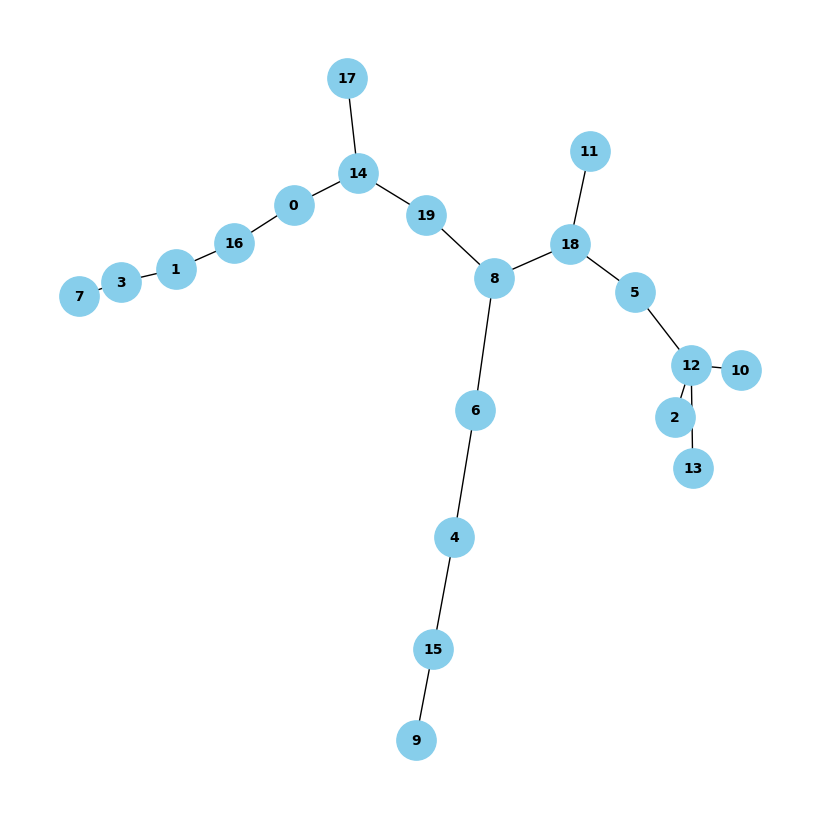

[(0, 81), (1, 107), (2, 107), (3, 123), (4, 87), (5, 77), (6, 73), (7, 141), (8, 61), (9, 121), (10, 107), (11, 85), (12, 89), (13, 107), (14, 71), (15, 103), (16, 93), (17, 89), (18, 67), (19, 65)]
[(0, 2), (1, 2), (2, 1), (3, 2), (4, 2), (5, 2), (6, 2), (7, 1), (8, 3), (9, 1), (10, 1), (11, 1), (12, 4), (13, 1), (14, 3), (15, 2), (16, 2), (17, 1), (18, 3), (19, 2)]
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 19), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)]


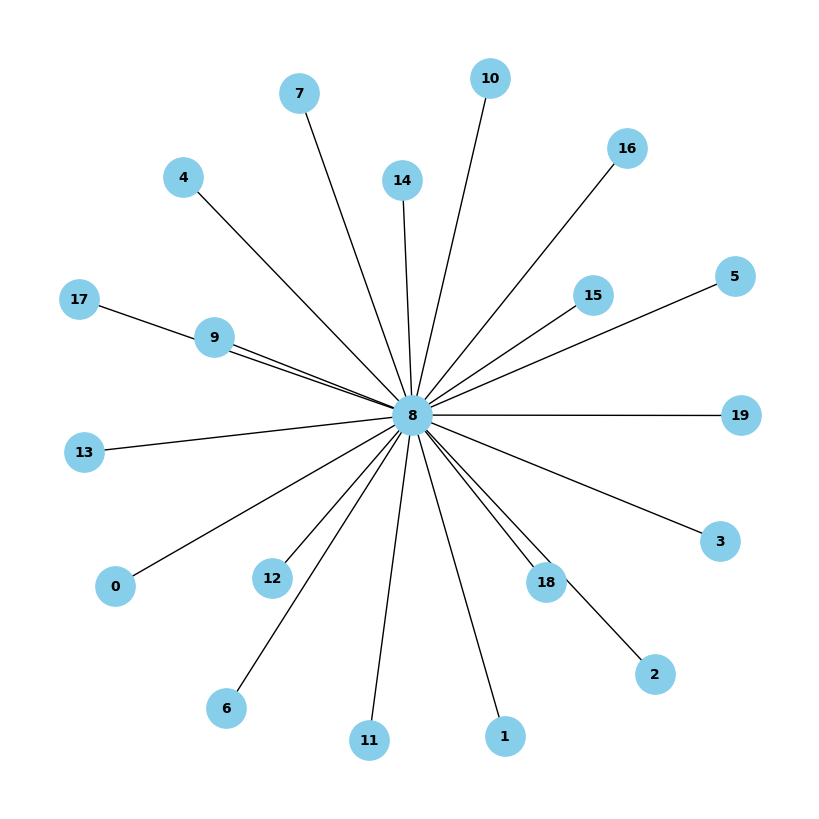

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19))

In [17]:
def nakljucni_zacetni_graf(n, e):
    # Create an initial random graph with the specified number of nodes
    G = nx.gnm_random_graph(n, e)
    # Ensure the graph is connected
    while not nx.is_connected(G):
        G = nx.gnm_random_graph(n, e)
    return G

n = 20
e = 19

g = nakljucni_zacetni_graf(n, e)



plt.figure(figsize=(8, 8))
nx.draw(g, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, font_size=10)
plt.show()
g.nodes()
r = []
for v in g.nodes:
    r.append((v, vsota_razdalj(g, v)))
print(r)
print(g.degree())
opti = ekzaktno_sum(g)
print(opti.degree())
plt.figure(figsize=(8, 8))
nx.draw(opti, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, font_size=10)
plt.show()
opti.nodes()